In [113]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns 
from collections import Counter
def counter(arr):
    return Counter(arr).most_common(3)
def resize( w_box, h_box, pil_image):
    w, h = pil_image.size  
    f1 = 1.0*w_box/w 
    f2 = 1.0*h_box/h    
    factor = min([f1, f2])   
    width = int(w*factor)    
    height = int(h*factor)    
    return pil_image.resize((width, height), Image.ANTIALIAS)  
import tkinter as tk
from PIL import ImageTk, Image
def plot_single_company(name):
    sec=Probality_for_UI.loc[name]["sec"].iloc[0]
    single_company_data=Probality_for_UI.loc[name].set_index("date")["probability"]
    plt.figure(figsize=(20,10))
    plt1=plt.plot(sector_p[str(int(sec))].loc[single_company_data.index[0]:],color='salmon',label='sector',linewidth=2)
    plt.title(name,fontsize=40)
    plt2=plt.plot(Probality_for_UI.loc[name].set_index("date")["probability"],color='darkcyan',label='MSFT')
    plt.axhline(y=0.5,color='gray',alpha=0.3,linewidth=10)
    ax1=plt.twinx()
    plt3=ax1.plot(np.log((dealing_data[name]+1).loc[single_company_data.index[0]:].cumprod()),label='log_price',color='peru',alpha=0.5)
    plt_all = plt1+plt2+plt3
    labs = [l.get_label() for l in plt_all]
    plt.legend(plt_all, labs, loc=0)
    plt.savefig("single_company.png")
    plt.show()
def plot_single_company(name):
    sec=Probality_for_UI.loc[name]["sec"].iloc[0]
    single_company_data=Probality_for_UI.loc[name].set_index("date")["probability"]
    plt.figure(figsize=(20,10))
    plt1=plt.plot(sector_p[str(int(sec))].loc[single_company_data.index[0]:],color='salmon',label='sector',linewidth=2)
    plt.title(name,fontsize=40)
    plt2=plt.plot(Probality_for_UI.loc[name].set_index("date")["probability"],color='darkcyan',label='MSFT')
    plt.axhline(y=0.5,color='gray',alpha=0.3,linewidth=10)
    ax1=plt.twinx()
    record_sub_return=((dealing_data[name].sub(SP_return.loc[dealing_data[name].index]["sprtrn"],axis=0))+2)
    rolling_return=pd.DataFrame(columns=["future"])
    for i in range(len(dealing_data[name])-252):
        rolling_return.loc[record_sub_return.index[i]]=record_sub_return.iloc[i:i+252].cumprod()[-1]
    plt3=ax1.plot(rolling_return,label='future return',color='peru',alpha=0.5)
    plt_all = plt1+plt2+plt3
    labs = [l.get_label() for l in plt_all]
    plt.legend(plt_all, labs, loc=0)
    plt.savefig("single_company.png")
    plt.show()
def plot_relative_company(name,end):
    sec=Probality_for_UI.loc[name]["sec"].iloc[0]
    start=(pd.to_datetime(end)+dt.timedelta(-365)).strftime('%Y-%m-%d')
    exist_company=list(set(Probality_for_UI.reset_index().set_index("date").loc[start:end]["company"]))
    start_corr=(pd.to_datetime(end)+dt.timedelta(-365*3)).strftime('%Y-%m-%d')
    high_relation_name=dealing_data[exist_company].loc[start_corr:end].corr()[name].sort_values(ascending=False).index[1:101]
    high_relation_name_sec=Probality_for_UI.loc[high_relation_name].reset_index()[["company","sec"]]
    belong_sec=high_relation_name_sec[high_relation_name_sec["company"].duplicated().apply(lambda x: not x)]["sec"]
    belong_sec=belong_sec[belong_sec>0]
    top_sec=[sec]
    top_sec=top_sec+[counter(belong_sec)[1:][0][0],counter(belong_sec)[1:][1][0]]
    high_relation_name_sec[high_relation_name_sec["company"].duplicated().apply(lambda x: not x)].set_index("sec").loc[top_sec[0]][:5]
    high_name_record=high_relation_name_sec[high_relation_name_sec["company"].duplicated().apply(lambda x: not x)].set_index("sec")
    name1=high_name_record.loc[top_sec[0]].iloc[:5].values.reshape(-1).tolist()
    name2=high_name_record.loc[top_sec[1]].iloc[:3].values.reshape(-1).tolist()
    name3=high_name_record.loc[top_sec[2]].iloc[:1].values.reshape(-1).tolist()
    sec_plot=[str(sec)]+[str(top_sec[0])]*5+[str(top_sec[1])]*3+[str(top_sec[2])]
    pb_plot=[Probality_for_UI.loc[name].set_index("date").loc[start:end].iloc[-1,:].loc["probability"]]
    for name_plot in name1+name2+name3:
        pb_plot.append(Probality_for_UI.loc[name_plot].set_index("date").loc[start:end].iloc[-1,:].loc["probability"])
    sort_data=pd.DataFrame([sec_plot,pb_plot,[name]+name1+name2+name3]).T.set_index(0).sort_index().reset_index()
    sec_plot=sort_data[0]
    pb_plot=sort_data[1]
    name_for_plot=sort_data[2]
    temp=Probality_for_UI.loc[name].set_index("date").loc[start:end].iloc[-1,:]
    sec=temp.loc["sec"]
    pb=temp.loc["probability"]
    continents = list(set(sec_plot))
    continent_colors=["sandybrown","#008B8B","lightcoral"]
    color_dict = dict(zip(continents, continent_colors))
    plt.figure(figsize=(10,10))
    plt.title(name,fontsize=32)
    bplot = sns.boxplot(x="sec",y="probability",data=Probality_for_UI.set_index("date").loc[start:end].set_index("sec").loc[top_sec].reset_index())
    for i in range(3):
        mybox = bplot.artists[i]
        mybox.set_facecolor(color_dict[continents[i]])
    plt.plot(sec_plot,pb_plot,'ko',markersize=10,alpha=0.5)
    for i in range(len(name_for_plot)):
        plt.text(sec_plot[i],pb_plot[i]-0.008,str("  ")+name_for_plot[i],fontsize=13,color='black')
    plt.savefig("relative_company.png")
    plt.show()
def plot_danger_time_company(end):
    start=(pd.to_datetime(end)+dt.timedelta(-90)).strftime('%Y-%m-%d')
    danger_time_company=Probality_for_UI.reset_index().set_index("date").loc[start:end].sort_values(by='probability')
    danger_time_company=danger_time_company.reset_index().set_index("sec").drop(0).reset_index()
    danger_time_company["sec"]=danger_time_company["sec"].astype(int).astype(str)
    plt.figure(figsize=(20,10))
    sns.boxplot(x="sec",y="probability",data=danger_time_company)
    for_text=danger_time_company[-10:][["sec","company","probability"]].set_index("sec").sort_index()
    plt.plot(for_text.index,for_text["probability"],'ko',markersize=10,alpha=0.5)
    for i in range(10):
        plt.text(for_text.index[i],for_text["probability"].iloc[i]-0.008,str("  ")+for_text["company"].iloc[i],fontsize=10,color='black')
    plt.savefig("danger_time_company.png")
    plt.show()
sector_dictionary={10:"Energy",15:"Materials",20:"Industrials",25:"Consumer Discretionary",30:"Consumer Staples",35:"Health Care",40:"Financials",45:"Information Technology",50:"Communication Services",55:"Utilities",60:"Real Estate"}

In [23]:
danger_time_company.reset_index().set_index("sec").drop(0)

,date,company,return,bad,url,QK,score,adjust_datetime,adjust_starttime,adjust_endtime,...,SP_return,Negative,Positive,Uncertainty,Litigious,StrongModal,WeakModal,Constraining,probability,prediction
sec,,,,,,,,,,,,,,,,,,,,,
55.0,2014-12-10,FGP,1.073307,0.0,/Archives/edgar/data/922358/000092235814000015...,Q,"[318, 72, 136, 115, 19, 44, 144]",2014-12-10,2014-12-10,2015-03-11,...,1.042544,318.0,72.0,136.0,115.0,19.0,44.0,144.0,0.000096,0.0
55.0,2014-11-25,NJR,1.131674,0.0,/Archives/edgar/data/356309/000035630914000113...,K,"[1492, 370, 645, 840, 64, 248, 443]",2014-11-25,2014-11-25,2015-02-04,...,0.968838,1492.0,370.0,645.0,840.0,64.0,248.0,443.0,0.000112,0.0
55.0,2014-11-21,NFG,0.980500,0.0,/Archives/edgar/data/70145/000007014514000095/...,K,"[2025, 560, 696, 862, 103, 134, 787]",2014-11-21,2014-11-21,2015-01-30,...,0.992384,2025.0,560.0,696.0,862.0,103.0,134.0,787.0,0.000115,0.0
40.0,2014-10-30,FDS,1.062233,0.0,/Archives/edgar/data/1013237/00014377491401908...,K,"[692, 264, 255, 144, 57, 65, 171]",2014-10-30,2014-10-30,2015-01-09,...,1.013286,692.0,264.0,255.0,144.0,57.0,65.0,171.0,0.000151,0.0
60.0,2014-12-04,MAYS,1.072056,0.0,/Archives/edgar/data/54187/000120677414003445/...,Q,"[239, 92, 91, 157, 10, 25, 50]",2014-12-04,2014-12-04,2015-03-05,...,1.037048,239.0,92.0,91.0,157.0,10.0,25.0,50.0,0.000533,0.0
40.0,2014-12-08,MCC,1.007920,0.0,/Archives/edgar/data/1490349/00011442041407283...,K,"[332, 108, 174, 137, 33, 70, 152]",2014-12-08,2014-12-08,2015-02-09,...,1.015689,332.0,108.0,174.0,137.0,33.0,70.0,152.0,0.000582,0.0
55.0,2014-12-10,SGU,1.087048,0.0,/Archives/edgar/data/1002590/00011931251443900...,K,"[1430, 345, 508, 380, 77, 202, 542]",2014-12-10,2014-12-10,2015-02-04,...,0.994667,1430.0,345.0,508.0,380.0,77.0,202.0,542.0,0.000611,0.0
30.0,2014-11-10,FARM,1.069216,0.0,/Archives/edgar/data/34563/000003456314000051/...,Q,"[0, 0, 0, 0, 0, 0, 0]",2014-11-10,2014-11-10,2015-02-09,...,0.989969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004015,0.0
40.0,2014-12-02,HNNA,1.039812,0.0,/Archives/edgar/data/1145255/00011931251443102...,K,"[169, 52, 86, 93, 10, 13, 55]",2014-12-02,2014-12-02,2015-01-29,...,1.001615,169.0,52.0,86.0,93.0,10.0,13.0,55.0,0.004519,0.0


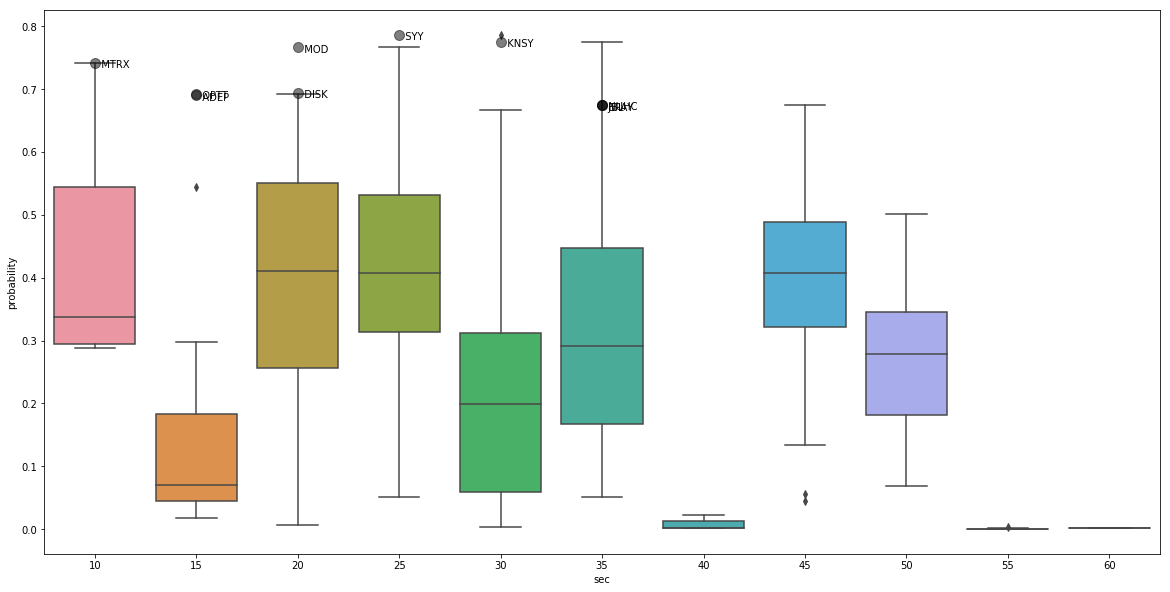

In [49]:
end="2008-01-01"
start=(pd.to_datetime(end)+dt.timedelta(-90)).strftime('%Y-%m-%d')
danger_time_company=Probality_for_UI.reset_index().set_index("date").loc[start:end].sort_values(by='probability')
danger_time_company=danger_time_company.reset_index().set_index("sec").drop(0).reset_index()
danger_time_company["sec"]=danger_time_company["sec"].astype(int).astype(str)
plt.figure(figsize=(20,10))
sns.boxplot(x="sec",y="probability",data=danger_time_company)
for_text=danger_time_company[-10:][["sec","company","probability"]].set_index("sec").sort_index()
plt.plot(for_text.index,for_text["probability"],'ko',markersize=10,alpha=0.5)
for i in range(10):
    plt.text(for_text.index[i],for_text["probability"].iloc[i]-0.008,str("  ")+for_text["company"].iloc[i],fontsize=10,color='black')
plt.savefig("danger_time_company.png")
plt.show()

In [32]:
danger_time_company[-20:][["sec","company","probability"]].set_index("sec").sort_index()

,company,probability
sec,,
10.0,PFIE,0.685519
15.0,RGLD,0.670819
20.0,OPTT,0.818869
20.0,CPST,0.727132
20.0,PMFG,0.669025
20.0,SINO,0.656566
20.0,BRC,0.656471
20.0,ASTC,0.621015
20.0,TAYD,0.647506


In [2]:
dealing_data=pd.read_csv("dealing_data.csv",index_col=0,parse_dates=True)
date_day=[dt.date(1995,1,1)+dt.timedelta(days=i) for i in range(8700)]

In [56]:
SP_return=pd.read_csv("SP_return.csv",index_col=0,parse_dates=True)+1

In [100]:
Probality_for_UI=pd.read_csv("final_prediction_sector_extra.csv",index_col=0,parse_dates=["date"])
Probality_for_UI_sector=Probality_for_UI.reset_index().set_index("sec")

In [5]:
#single company
# sector_probality=Probality_for_UI_sector.loc[45].set_index("date").sort_index()
# sector_p=pd.DataFrame(columns=sector_probality.columns[-3:])
# for date in date_day:
#     sector_p.loc[date]=sector_probality.loc[date-dt.timedelta(days=120):date].iloc[:,-3:].mean()
# sector_p=sector_p.dropna()

In [59]:
# sector_p=pd.DataFrame()
# for sec in list(sector_dictionary.keys()):
#     sector_probality=Probality_for_UI_sector.loc[sec].set_index("date").sort_index()
#     sector_p_each=pd.DataFrame(columns=[sector_probality.columns[-2]])
#     for date in date_day:
#         sector_p_each.loc[date]=sector_probality.loc[date-dt.timedelta(days=365):date].iloc[:,-2].mean()
#     sector_p_each=sector_p_each.dropna()
#     sector_p=pd.concat([sector_p,sector_p_each],axis=1)
# sector_p.columns=list(sector_dictionary.keys())

In [102]:
#sector_p.to_csv("sector_p.csv")

In [106]:
sector_p=pd.read_csv("sector_p.csv",index_col=0,parse_dates=True)

In [108]:
opaque_sentiment_sector=sector_p.copy()
opaque_sentiment_sector=opaque_sentiment_sector.loc["1998-01-01":]

In [54]:
#opaque_sentiment_sector=sector_p.T.reset_index().set_index(["level_1","level_0"]).T["probability"]
#opaque_sentiment_sector=opaque_sentiment_sector.drop([0,40,55,60],axis=1)
# opaque_sentiment_sector.index=pd.to_datetime(opaque_sentiment_sector.index)
# opaque_sentiment_sector=opaque_sentiment_sector.loc["1998-01-01":]
# opaque_sentiment_sector.columns=[sector_dictionary[sector_number] for sector_number in list(opaque_sentiment_sector.columns)]

In [109]:
sector_dictionary

{10: 'Energy',
 15: 'Materials',
 20: 'Industrials',
 25: 'Consumer Discretionary',
 30: 'Consumer Staples',
 35: 'Health Care',
 40: 'Financials',
 45: 'Information Technology',
 50: 'Communication Services',
 55: 'Utilities',
 60: 'Real Estate'}

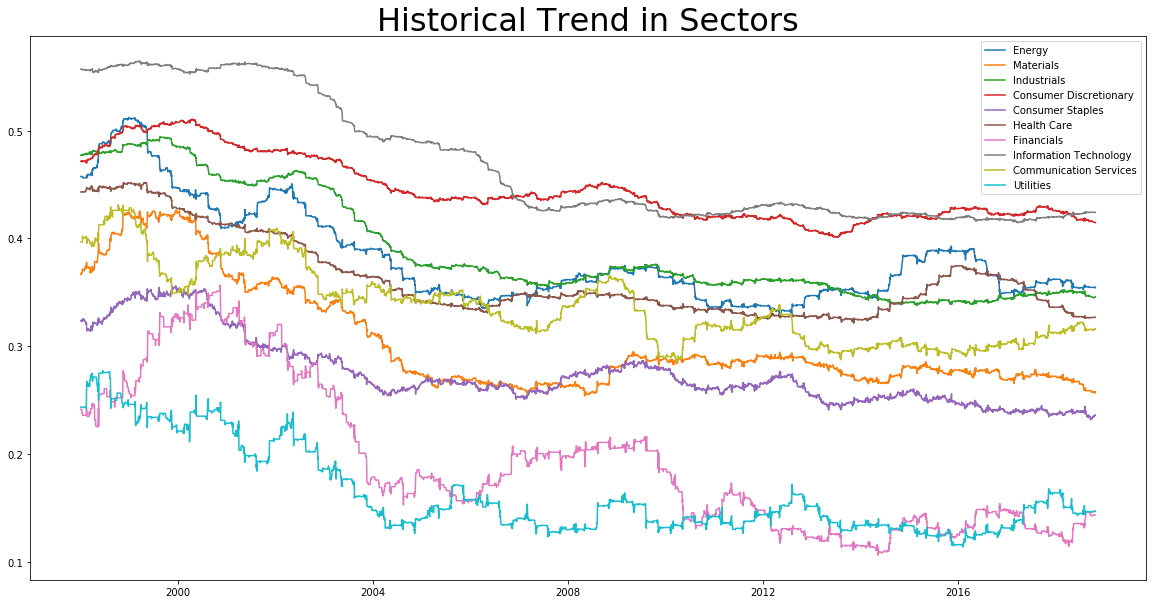

In [110]:
# plt.figure(figsize=(20,10))
# for i in range(opaque_sentiment_sector.shape[1]-1):
#     plt.plot(opaque_sentiment_sector.iloc[:,i],label=sector_dictionary[int(opaque_sentiment_sector.columns[i])])
# plt.title("Historical Trend in Sectors",fontsize=32)
# plt.legend()
# plt.savefig("all_sector.png")
# plt.show()

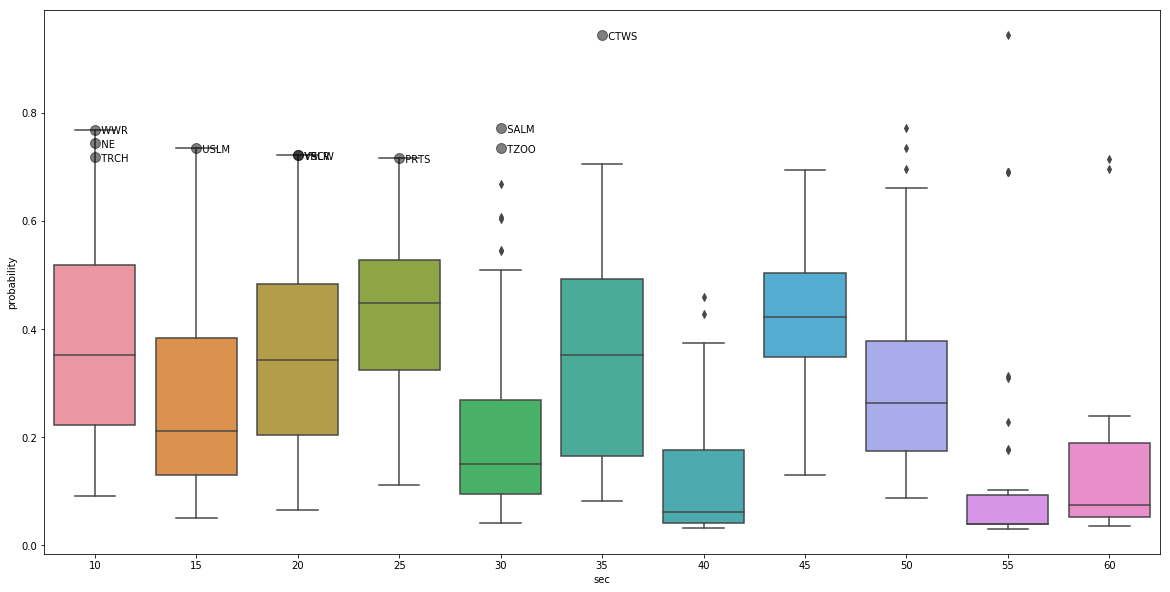

In [117]:
end="2017-12-31"
start=(pd.to_datetime(end)+dt.timedelta(-90)).strftime('%Y-%m-%d')
danger_time_company=Probality_for_UI.reset_index().set_index("date").loc[start:end].sort_values(by='probability')
danger_time_company=danger_time_company.reset_index().set_index("sec").drop(0).reset_index()
danger_time_company["sec"]=danger_time_company["sec"].astype(int).astype(str)
plt.figure(figsize=(20,10))
sns.boxplot(x="sec",y="probability",data=danger_time_company)
for_text=danger_time_company[-10:][["sec","company","probability"]].set_index("sec").sort_index()
plt.plot(for_text.index,for_text["probability"],'ko',markersize=10,alpha=0.5)
for i in range(10):
    plt.text(for_text.index[i],for_text["probability"].iloc[i]-0.008,str("  ")+for_text["company"].iloc[i],fontsize=10,color='black')
plt.savefig("all_sector.png")
plt.show()

In [10]:
# name="MSFT"
# end="2000-01-01"
# sec=45
# plot_single_company(name)

In [11]:
#single company
# name="A"
# end="2006-01-01"
# sec=Probality_for_UI.loc[name]["sec"].iloc[0]
# start=(pd.to_datetime(end)+dt.timedelta(-365)).strftime('%Y-%m-%d')
# exist_company=list(set(Probality_for_UI.reset_index().set_index("date").loc[start:end]["company"]))
# start_corr=(pd.to_datetime(end)+dt.timedelta(-365*3)).strftime('%Y-%m-%d')
# high_relation_name=dealing_data[exist_company].loc[start_corr:end].corr()[name].sort_values(ascending=False).index[1:101]
# high_relation_name_sec=Probality_for_UI.loc[high_relation_name].reset_index()[["company","sec"]]
# belong_sec=high_relation_name_sec[high_relation_name_sec["company"].duplicated().apply(lambda x: not x)]["sec"]
# top_sec=[sec]
# top_sec=top_sec+[counter(belong_sec)[1:][0][0],counter(belong_sec)[1:][1][0]]
# high_relation_name_sec[high_relation_name_sec["company"].duplicated().apply(lambda x: not x)].set_index("sec").loc[top_sec[0]][:5]
# high_name_record=high_relation_name_sec[high_relation_name_sec["company"].duplicated().apply(lambda x: not x)].set_index("sec")
# name1=high_name_record.loc[top_sec[0]][:5].values.reshape(-1).tolist()
# name2=high_name_record.loc[top_sec[1]][:3].values.reshape(-1).tolist()
# name3=high_name_record.loc[top_sec[2]][:1].values.reshape(-1).tolist()
# sec_plot=[str(sec)]+[str(top_sec[0])]*5+[str(top_sec[1])]*3+[str(top_sec[2])]
# pb_plot=[Probality_for_UI.loc[name].set_index("date").loc[start:end].iloc[-1,:].loc["predictions with opaque&sentiment"]]
# for name_plot in name1+name2+name3:
#     pb_plot.append(Probality_for_UI.loc[name_plot].set_index("date").loc[start:end].iloc[-1,:].loc["predictions with opaque&sentiment"])
# sort_data=pd.DataFrame([sec_plot,pb_plot,[name]+name1+name2+name3]).T.set_index(0).sort_index().reset_index()
# sec_plot=sort_data[0]
# pb_plot=sort_data[1]
# name_for_plot=sort_data[2]

In [12]:
# temp=Probality_for_UI.loc[name].set_index("date").loc[start:end].iloc[-1,:]
# sec=temp.loc["sec"]
# pb=temp.loc["predictions with opaque&sentiment"]
# continents = list(set(sec_plot))
# continent_colors=["sandybrown","#008B8B","lightcoral"]
# color_dict = dict(zip(continents, continent_colors))
# plt.figure(figsize=(10,10))
# bplot = sns.boxplot(x="sec",y="predictions with opaque&sentiment",data=Probality_for_UI.set_index("date").loc[start:end].set_index("sec").loc[top_sec].reset_index())
# for i in range(3):
#     mybox = bplot.artists[i]
#     mybox.set_facecolor(color_dict[continents[i]])
# plt.plot(sec_plot,pb_plot,'ko',markersize=10,alpha=0.5)
# for i in range(len(name_for_plot)):
#     plt.text(sec_plot[i],pb_plot[i]-0.008,str("  ")+name_for_plot[i],fontsize=13,color='black')
# plt.show()

In [ ]:
def get_company_name():
    company.append(e.get())
    desire_time.append(f.get())
    if var.get()=='Historical Trend Plot':
        name=company[-1]
        plot_single_company(name)
        img=ImageTk.PhotoImage(resize(1000,1000,Image.open("single_company.png")))
    elif var.get()=='Sector Comparison Plot':
        name=company[-1]
        end=desire_time[-1]
        plot_relative_company(name,end)
        img=ImageTk.PhotoImage(resize(500,500,Image.open("relative_company.png")))
    elif var.get()=='Danger Company Plot':
        end=desire_time[-1]
        plot_danger_time_company(end)
        img=ImageTk.PhotoImage(resize(1000,1000,Image.open("danger_time_company.png")))
#    canvas.itemconfig(canvas.create_image(500, 250, image=img),image = img)
#    canvas.pack(side = "bottom")
#    canvas.update()
    panel.configure(image=img)
    panel.image = img
def search_ticker():
    sector_now=list(sector_dictionary.keys())[list(sector_dictionary.values()).index(variable.get())]
    this_sector_name=list(set(Probality_for_UI_sector.loc[sector_now]["company"]))
    w2['menu'].delete(0, 'end') 
    for choice in this_sector_name: 
         w2['menu'].add_command(label=choice, command=tk._setit(variable2, choice)) 
window = tk.Tk()
window.title('financial report')
window.geometry('1000x720')
#window.config(background = "red")
var=tk.StringVar()
global img
img2=ImageTk.PhotoImage(resize(1000,1000,Image.open("all_sector.png")))
company=[]
desire_time=[]
l=tk.Label(window,width=40,text='Financial Statement Transparency',font=("Helvetica",32))
l.pack()
e = tk.Entry(window,width=15, show = None)
f = tk.Entry(window,width=15, show = None)
g = tk.Label(window,width=12,text='company name',font=("Helvetica",20))
h = tk.Label(window,width=12,text='search date',font=("Helvetica",20))
g.place(x=180, y=90, anchor='nw')
e.place(x=330, y=90, anchor='nw')
h.place(x=500, y=90, anchor='nw')
f.place(x=650, y=90, anchor='nw')
OPTIONS = list(set(sector_dictionary.values()))
variable = tk.StringVar()
variable.set(OPTIONS[0])
sector_now=list(sector_dictionary.keys())[list(sector_dictionary.values()).index(variable.get())]
this_sector_name=list(set(Probality_for_UI_sector.loc[sector_now]["company"]))
variable2 = tk.StringVar()
variable2.set(this_sector_name[0])
w_text = tk.Label(window,width=20,text='GIC sector choose',font=("Helvetica",20))
w_text.place(x=130, y=61, anchor='nw')
w = tk.OptionMenu(window,variable, *(OPTIONS))
w.place(x=340, y=65, anchor='nw')
w2 = tk.OptionMenu(window, variable2, *(this_sector_name))
w2.place(x=630, y=65, anchor='nw')
b2 = tk.Button(window, text='search ticker', width=12, height=1, command=search_ticker,font=("Helvetica",12))
b2.place(x=530, y=67, anchor='nw')
b1 = tk.Button(window, text='search for company name', width=40, height=2, command=get_company_name,font=("Helvetica",20))
b1.place(x=250, y=130, anchor='nw')
r1=tk.Radiobutton(window,text='Historical Trend Plot',variable=var,value='Historical Trend Plot')
r1.place(x=220, y=40, anchor='nw')
r2=tk.Radiobutton(window,text='Sector Comparison Plot',variable=var,value='Sector Comparison Plot')
r2.place(x=420, y=40, anchor='nw')
r2=tk.Radiobutton(window,text='Danger Company Plot',variable=var,value='Danger Company Plot')
r2.place(x=620, y=40, anchor='nw')
#canvas = tk.Canvas(window, height=500, width=1000)
#image = canvas.create_image(500, 250, image=img2)
#canvas.pack(side = "bottom")
panel = tk.Label(window, image = img2)
def _quit():
    window.quit()
    window.destroy()
button =tk.Button(window, text='Quit', command=_quit)
button.pack(side="bottom")
panel.pack(side = "bottom")
tk.mainloop()

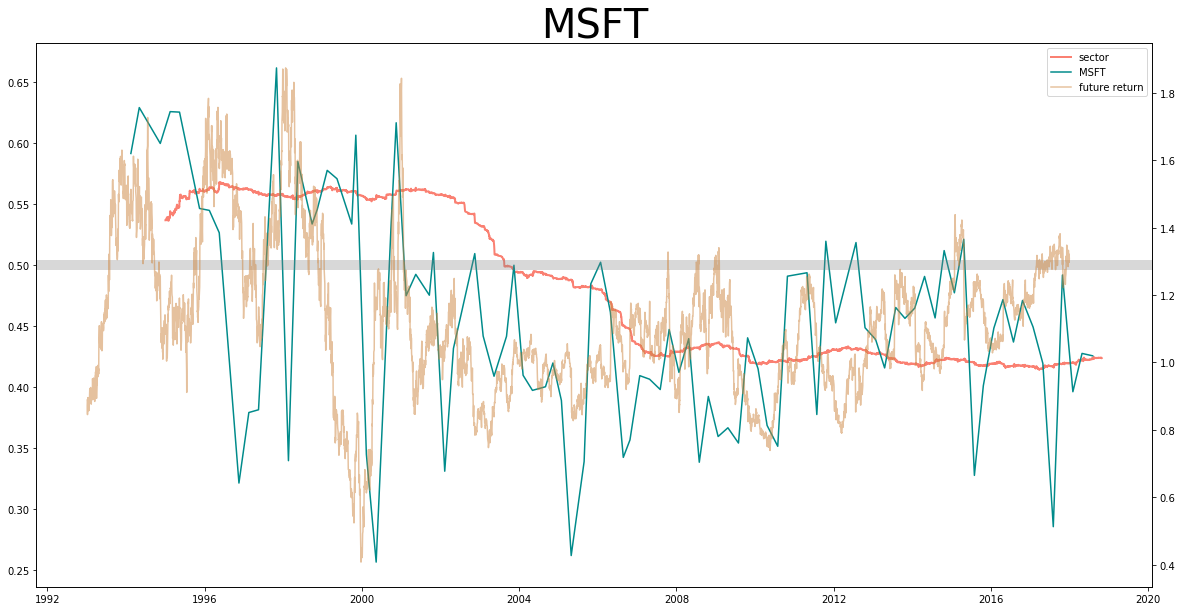

In [112]:
name="MSFT"
sec=Probality_for_UI.loc[name]["sec"].iloc[0]
single_company_data=Probality_for_UI.loc[name].set_index("date")["probability"]
plt.figure(figsize=(20,10))
plt1=plt.plot(sector_p[str(int(sec))].loc[single_company_data.index[0]:],color='salmon',label='sector',linewidth=2)
plt.title(name,fontsize=40)
plt2=plt.plot(Probality_for_UI.loc[name].set_index("date")["probability"],color='darkcyan',label='MSFT')
plt.axhline(y=0.5,color='gray',alpha=0.3,linewidth=10)
ax1=plt.twinx()
record_sub_return=((dealing_data[name].sub(SP_return.loc[dealing_data[name].index]["sprtrn"],axis=0))+2)
rolling_return=pd.DataFrame(columns=["future"])
for i in range(len(dealing_data[name])-252):
    rolling_return.loc[record_sub_return.index[i]]=record_sub_return.iloc[i:i+252].cumprod()[-1]
plt3=ax1.plot(rolling_return,label='future return',color='peru',alpha=0.5)
plt_all = plt1+plt2+plt3
labs = [l.get_label() for l in plt_all]
plt.legend(plt_all, labs, loc=0)
plt.savefig("single_company.png")
plt.show()

In [95]:
Probality_for_UI

,adjust_datetime,return,bad,url,QK,Negative,Positive,Uncertainty,Litigious,StrongModal,WeakModal,Constraining,adjust_starttime,adjust_endtime,opaque,sec,SP_return,probability,prediction
date,,,,,,,,,,,,,,,,,,,
2000-03-15,2000-03-15,0.680463,1.0,/Archives/edgar/data/1090872/00009120570001170...,Q,508,176,250,304,63,143,116,2000-03-15,2000-06-12,0.000000,35.0,0.978001,0.639357,1.0
2000-06-12,2000-06-12,0.937685,0.0,/Archives/edgar/data/1090872/00009120570002820...,Q,494,133,223,278,42,133,97,2000-06-12,2000-09-01,0.000000,35.0,1.013764,0.537244,1.0
2000-09-01,2000-09-01,0.893940,0.0,/Archives/edgar/data/1090872/00009120570004000...,Q,490,117,208,273,33,121,114,2000-09-01,2001-01-17,0.000000,35.0,0.878735,0.362609,0.0
2001-01-17,2001-01-17,0.557929,1.0,/Archives/edgar/data/1090872/00010958110100022...,K,569,172,231,284,47,126,127,2001-01-17,2001-03-19,0.000000,35.0,0.865028,0.622437,1.0
2001-03-19,2001-03-19,0.947393,0.0,/Archives/edgar/data/1090872/00010958110100163...,Q,449,121,200,232,40,123,111,2001-03-19,2001-06-14,0.000000,35.0,1.107807,0.620137,1.0
2001-06-14,2001-06-14,0.821604,0.0,/Archives/edgar/data/1090872/00008916180150118...,Q,519,123,209,225,47,130,107,2001-06-14,2001-09-14,0.000000,35.0,0.877723,0.612532,1.0
2001-09-14,2001-09-14,1.462535,0.0,/Archives/edgar/data/1090872/00010958110150492...,Q,572,145,235,222,55,144,126,2001-09-14,2002-01-22,0.000000,35.0,1.186779,0.542246,1.0
2002-01-22,2002-01-22,1.034088,0.0,/Archives/edgar/data/1090872/00008916180200018...,K,663,168,262,243,54,130,156,2002-01-22,2002-03-06,2.303592,35.0,1.008404,0.502519,1.0
2002-03-06,2002-03-06,0.741458,0.0,/Archives/edgar/data/1090872/00008916180200104...,Q,547,173,257,183,41,129,132,2002-03-06,2002-06-05,2.303592,35.0,0.925112,0.447474,0.0


In [93]:
rolling_return

,future
1993-01-04,0.888332
1993-01-05,0.887577
1993-01-06,0.867901
1993-01-07,0.845182
1993-01-08,0.871900
1993-01-11,0.895668
1993-01-12,0.880637
1993-01-13,0.869820
1993-01-14,0.856475
1993-01-15,0.864726


In [80]:
dealing_data[name]+1

1993-01-04    0.997072
1993-01-05    1.016153
1993-01-06    1.028902
1993-01-07    0.980337
1993-01-08    0.998567
1993-01-11    1.022956
1993-01-12    1.007013
1993-01-13    1.016713
1993-01-14    1.000000
1993-01-15    0.983562
1993-01-18    0.994429
1993-01-19    0.990196
1993-01-20    1.000000
1993-01-21    1.012730
1993-01-22    0.998603
1993-01-25    0.990210
1993-01-26    0.994350
1993-01-27    0.980114
1993-01-28    1.008696
1993-01-29    0.994253
1993-02-01    1.011561
1993-02-02    1.017143
1993-02-03    0.992978
1993-02-04    0.961810
1993-02-05    1.047059
1993-02-08    0.963483
1993-02-09    0.978134
1993-02-10    1.019374
1993-02-11    0.997076
1993-02-12    0.980938
                ...   
2018-11-15    1.022006
2018-11-16    1.009415
2018-11-19    0.966110
2018-11-20    0.972185
2018-11-21    1.013765
2018-11-23    0.999612
2018-11-26    1.032987
2018-11-27    1.006293
2018-11-28    1.037148
2018-11-29    0.991631
2018-11-30    1.006353
2018-12-03    1.010822
2018-12-04 

In [63]:
SP_return.loc[dealing_data[name].index]

,sprtrn
caldt,
1993-01-04,0.999243
1993-01-05,0.997611
1993-01-06,1.000414
1993-01-07,0.991278
1993-01-08,0.996100
1993-01-11,1.004428
1993-01-12,1.000209
1993-01-13,1.004617
1993-01-14,1.006720
